# AlexNet Implementation on Fashion MNIST dataset
## Author: Tom Tabak (Student ID:160889015)

(60000, 28, 28)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 54, 54, 96)        11712     
_________________________________________________________________
activation_6 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
activation_7 (Activation)    (None, 23, 23, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9,

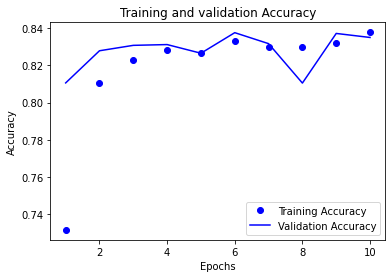

In [0]:
 import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf

(x_train, y_train), (x_test, y_test) =fashion_mnist.load_data()

x_train=x_train.astype('uint8')
x_test=x_test.astype('uint8')


y_train, y_test=keras.utils.to_categorical(y_train, 10), keras.utils.to_categorical(y_test, 10)
print(np.shape(x_train))
X_train = []
for i in range(np.shape(x_train)[0]):
    res = cv2.resize(x_train[i], (224, 224))
    X_train.append(res)
X_train=np.array(X_train)
X_train = np.reshape(X_train, [np.shape(X_train)[0], 224,224,1])





np.random.seed(1000)
#Instantiate an empty model

def AlexNet():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=(224,224,1), kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # Passing it to a Fully Connected layer
    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(4096, input_shape=(227*227*3,), activation='relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))

    # 2nd Fully Connected Layer
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.4))

    # 3rd Fully Connected Layer
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.4))

    # Output Layer
    model.add(Dense(10, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

AlexNet = AlexNet()

hist = AlexNet.fit(X_train, y_train, verbose=2, validation_split=0.2, epochs=10, batch_size=32)#, steps_per_epoch=1000, validation_steps=1000)


history_dict = hist.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


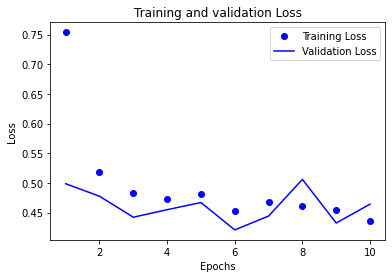

In [0]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
X_test = []
for i in range(np.shape(x_test)[0]):
    res = cv2.resize(x_test[i], (224, 224))
    X_test.append(res)
X_test=np.array(X_test)
X_test = np.reshape(X_test, [np.shape(X_test)[0], 224,224,1])
print('Accuracy: {}'.format(AlexNet.evaluate(X_test, y_test, batch_size=32)[1]))

10000/10000 [==============================] - 2s 248us/step
Accuracy: 0.8392000198364258


In [0]:
import sklearn
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Short', 'Sneaker', 'Bag', 'Ankele Boot']
predictions = AlexNet.predict(X_test)
class_report = sklearn.metrics.classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = class_names)
print(class_report)

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.88      0.80      1000
     Trouser       0.99      0.94      0.96      1000
    Pullover       0.71      0.72      0.71      1000
       Dress       0.86      0.88      0.87      1000
        Coat       0.68      0.69      0.69      1000
      Sandal       0.97      0.96      0.96      1000
       Short       0.62      0.48      0.54      1000
     Sneaker       0.92      0.95      0.93      1000
         Bag       0.94      0.96      0.95      1000
 Ankele Boot       0.95      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

